# Exploratory Data Analysis
This project performs exploratory data analysis on an electric vehicle dataset to study pricing, battery capacity, driving range, vehicle type,  efficiency, and manufacturer trends. The analysis highlights EV availability across countries and cities and compares manufacturer strategies using visualizations and summary statistics.


In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Cleaned Dataset
df=pd.read_csv('EV_dataset.txt')
df         

,manufacturer,model,type,drive_type,fuel_type,color,battery_kwh,range_km,charging_time_hr,fast_charging,...,city,seats,price_usd,efficiency_score,acceleration_0_100_kmph,top_speed_kmph,warranty_years,cargo_space_liters,safety_rating,target_high_efficiency
0,BYD,Model S,Coupe,FWD,Electric,Blue,84.93,464.06,0.85,1,...,Shanghai,7,32213.0,5.394897,5.84,136.00,3,248.9,3.3,1
1,Lucid,EV6,Sedan,AWD,Electric,Blue,65.14,345.36,2.03,1,...,Tokyo,7,31125.0,5.067074,3.86,149.34,5,504.3,3.6,1
2,Volkswagen,EV6,SUV,FWD,Hybrid,White,22.75,104.25,0.22,1,...,Oslo,5,15674.0,5.057602,2.85,275.80,5,424.9,4.2,1
3,BMW,Ioniq,Sedan,AWD,Hybrid,Black,71.72,341.74,0.48,0,...,Vancouver,2,24044.0,4.826029,3.78,130.41,8,398.5,4.9,0
4,Volkswagen,Model 3,Truck,AWD,Hybrid,Green,62.99,338.16,0.79,1,...,Shenzhen,4,29567.0,5.222624,7.07,253.31,7,411.4,3.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Lucid,Bolt,Coupe,AWD,Hybrid,Yellow,74.63,419.61,2.36,1,...,Delhi,2,29188.0,5.942839,9.41,215.77,7,402.0,5.0,1
249996,Chevrolet,Ioniq,Hatchback,AWD,Hybrid,Red,102.25,475.16,0.84,0,...,Paris,7,34595.0,4.846013,5.86,146.19,10,388.5,4.6,0
249997,Hyundai,i3,Truck,AWD,Hybrid,Red,81.16,400.83,1.08,1,...,Paris,4,29931.0,5.723986,8.95,273.57,3,414.0,3.2,1
249998,Ford,Mustang Mach-E,Truck,FWD,Hybrid,Silver,67.63,289.30,0.90,1,...,Shanghai,4,25308.0,4.203677,8.27,172.11,7,472.7,3.8,0


#### Analyzing dataset

In [3]:
df.shape

(250000, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   manufacturer             250000 non-null  object 
 1   model                    250000 non-null  object 
 2   type                     250000 non-null  object 
 3   drive_type               250000 non-null  object 
 4   fuel_type                250000 non-null  object 
 5   color                    250000 non-null  object 
 6   battery_kwh              250000 non-null  float64
 7   range_km                 250000 non-null  float64
 8   charging_time_hr         250000 non-null  float64
 9   fast_charging            250000 non-null  int64  
 10  release_year             250000 non-null  int64  
 11  country                  250000 non-null  object 
 12  city                     250000 non-null  object 
 13  seats                    250000 non-null  int64  
 14  pric

This output shows the structure of the dataset, including column names, data types, and non-null values. The dataset contains a total of 22 columns with 250000 non-null entries in each column, indicating that there are no missing values.


In [5]:
df.describe()

,battery_kwh,range_km,charging_time_hr,fast_charging,release_year,seats,price_usd,efficiency_score,acceleration_0_100_kmph,top_speed_kmph,warranty_years,cargo_space_liters,safety_rating,target_high_efficiency
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,75.022846,375.165806,1.071556,0.498844,2018.511452,4.800124,30515.505508,4.999806,6.249837,199.984872,6.598360,449.594702,4.000117,0.499860
std,20.058240,109.856364,0.656354,0.500000,4.033158,1.721400,7248.021911,0.764291,2.166595,46.225610,2.419298,99.071709,0.578886,0.500001
min,0.160000,0.640000,0.010000,0.000000,2012.000000,2.000000,1642.000000,2.194368,2.500000,120.000000,3.000000,31.400000,3.000000,0.000000
25%,61.470000,299.177500,0.610000,0.000000,2015.000000,4.000000,25553.000000,4.448975,4.370000,159.920000,5.000000,382.500000,3.500000,0.000000
50%,74.990000,370.380000,0.860000,0.000000,2019.000000,5.000000,30502.000000,4.999715,6.250000,199.960000,7.000000,450.200000,4.000000,0.000000
75%,88.550000,446.390000,1.330000,1.000000,2022.000000,6.000000,35483.000000,5.552174,8.130000,239.970000,8.000000,517.300000,4.500000,1.000000
max,150.000000,872.260000,3.370000,1.000000,2025.000000,7.000000,60045.000000,8.000000,10.000000,280.000000,10.000000,682.700000,5.000000,1.000000


- This table presents the descriptive statistics of the numerical features in the dataset. Each column contains 250000 observations, confirming the consistency and completeness of the data.
- The average battery capacity is approximately 75 kWh, with vehicle ranges around 375 km, indicating a realistic distribution of electric vehicle performance. The charging time shows a mean of about 1.07 hours, while the fast_charging feature is almost evenly split between supported and non-supported vehicles.
- Most vehicles in the dataset were released between 2015 and 2022, with a median release year of 2019. The average vehicle has 5 seats and is priced around 30500 USD, making the dataset representative of mid-range electric vehicles.
- Performance-related features such as acceleration (0–100 km/h) and top speed show reasonable variation, with average acceleration close to 6.25 seconds and top speeds around 200 km/h. The efficiency score is well-distributed around a mean value of 5, and safety ratings are centered near 4, suggesting safe and efficient vehicles.

In [6]:
#unique values count
df.nunique()    

manufacturer                   10
model                          11
type                            6
drive_type                      3
fuel_type                       2
color                           8
battery_kwh                 11857
range_km                    50493
charging_time_hr              337
fast_charging                   2
release_year                   14
country                        10
city                           21
seats                           5
price_usd                   35663
efficiency_score           250000
acceleration_0_100_kmph       751
top_speed_kmph              16001
warranty_years                  5
cargo_space_liters           5545
safety_rating                  21
target_high_efficiency          2
dtype: int64

In [7]:
#unique column values
columns=['manufacturer','model','type','drive_type','fuel_type','country','city']
for i in columns:
    values=df[i].unique()
    print(i.upper(),':',values,'count =',len(values))

MANUFACTURER : ['BYD' 'Lucid' 'Volkswagen' 'BMW' 'Chevrolet' 'Nissan' 'Ford' 'Kia'
 'Tesla' 'Hyundai'] count = 10
MODEL : ['Model S' 'EV6' 'Ioniq' 'Model 3' 'Leaf' 'ID.4' 'Model X'
 'Mustang Mach-E' 'Bolt' 'Air' 'i3'] count = 11
TYPE : ['Coupe' 'Sedan' 'SUV' 'Truck' 'Hatchback' 'Crossover'] count = 6
DRIVE_TYPE : ['FWD' 'AWD' 'RWD'] count = 3
FUEL_TYPE : ['Electric' 'Hybrid'] count = 2
COUNTRY : ['China' 'Japan' 'Norway' 'Canada' 'UK' 'France' 'India' 'Germany' 'USA'
 'South Korea'] count = 10
CITY : ['Shanghai' 'Tokyo' 'Oslo' 'Vancouver' 'Shenzhen' 'London' 'Toronto'
 'Paris' 'Pune' 'Osaka' 'Manchester' 'Munich' 'New York' 'Bangalore'
 'Beijing' 'Delhi' 'Seoul' 'Austin' 'San Francisco' 'Seattle' 'Berlin'] count = 21


In [8]:
category_columns=df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_columns)
print("Numerical Variables:")
print(numerical_columns)

Categorical Variables:
['manufacturer', 'model', 'type', 'drive_type', 'fuel_type', 'color', 'country', 'city']
Numerical Variables:
['battery_kwh', 'range_km', 'charging_time_hr', 'fast_charging', 'release_year', 'seats', 'price_usd', 'efficiency_score', 'acceleration_0_100_kmph', 'top_speed_kmph', 'warranty_years', 'cargo_space_liters', 'safety_rating', 'target_high_efficiency']


## Analyze price, range, battery size distribution

### 1. Price Distribution


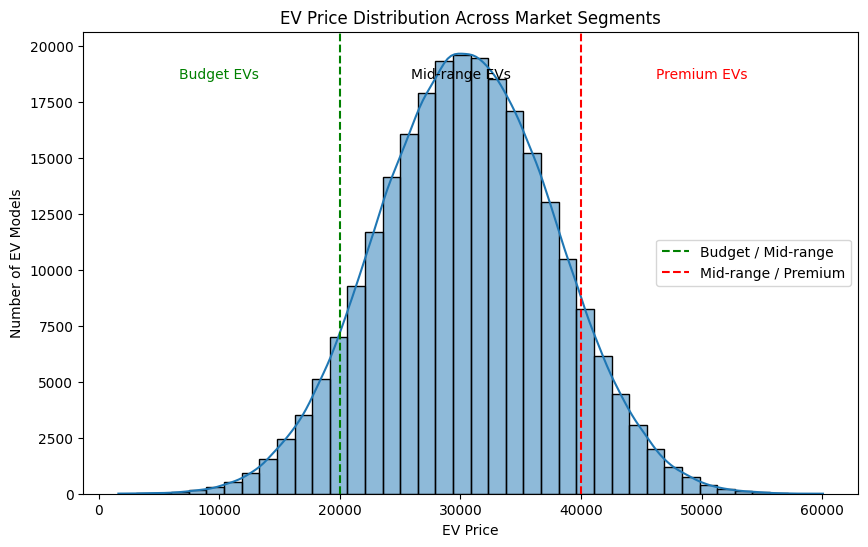

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_usd'], bins=40, kde=True)

plt.axvline(20000, color='green', linestyle='--', label='Budget / Mid-range')
plt.axvline(40000, color='red', linestyle='--', label='Mid-range / Premium')

plt.text(10000, plt.ylim()[1]*0.9, 'Budget EVs', color='green', ha='center')
plt.text(30000, plt.ylim()[1]*0.9, 'Mid-range EVs', color='black', ha='center')
plt.text(50000, plt.ylim()[1]*0.9, 'Premium EVs', color='red', ha='center')

plt.xlabel("EV Price")
plt.ylabel("Number of EV Models")
plt.title("EV Price Distribution Across Market Segments")
plt.legend()
plt.show()

The price distribution shows that most EV models are concentrated in the mid-range segment, indicating a market focus on moderately priced vehicles. Budget EVs form a smaller share, while premium EVs are fewer and concentrated at higher price levels. This suggests that while affordable options exist, the EV market is currently dominated by mid-priced models.

### 2. Range Distribution


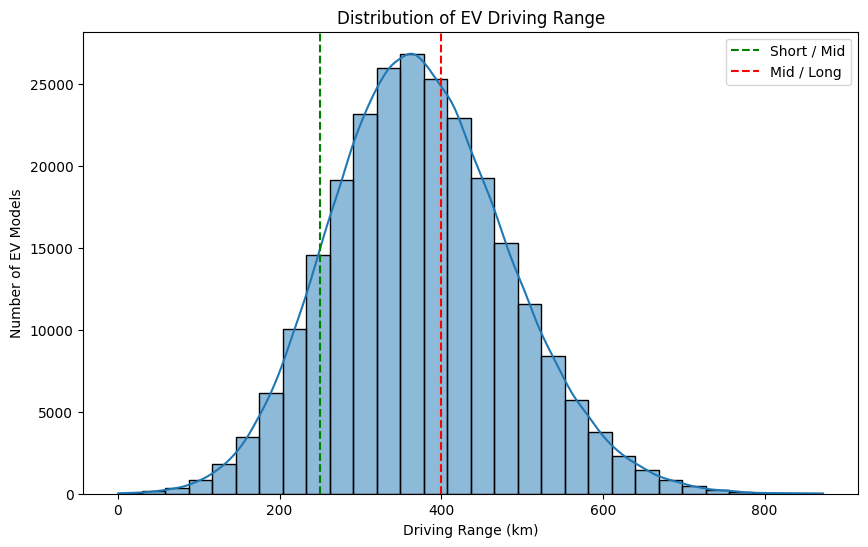

In [10]:
ev_range=df['range_km']
plt.figure(figsize=(10,6))
sns.histplot(ev_range, bins=30, kde=True)

plt.axvline(250, color='green', linestyle='--', label='Short / Mid')
plt.axvline(400, color='red', linestyle='--', label='Mid / Long')

plt.xlabel("Driving Range (km)")
plt.ylabel("Number of EV Models")
plt.title("Distribution of EV Driving Range")
plt.legend()
plt.show()


The driving range distribution shows that most EV models fall within the mid-range category, indicating that manufacturers prioritize balanced range suitable for daily use. Short-range EVs are fewer, while long-range models form a smaller but noticable segment, catering to premium and long-distance use cases.

### 3. Battery Size Distribution


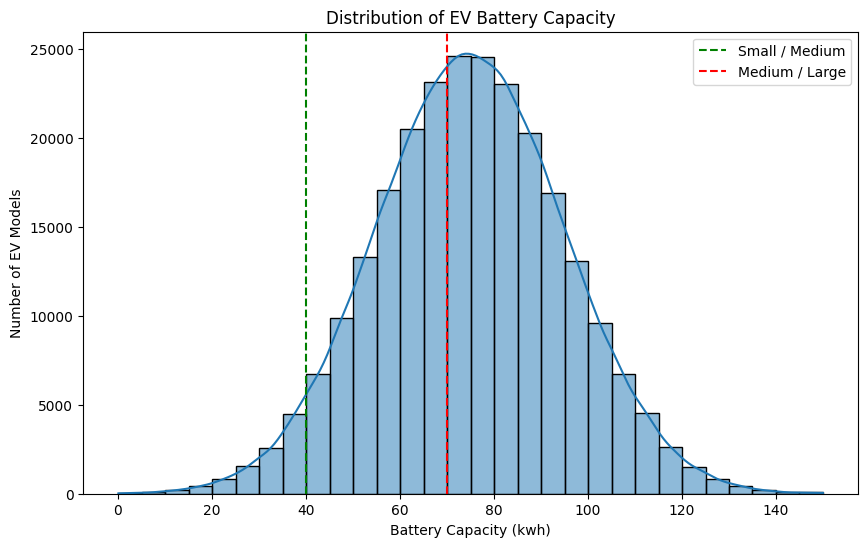

In [11]:
battery=df['battery_kwh']
plt.figure(figsize=(10,6))
sns.histplot(battery, bins=30, kde=True)

plt.axvline(40, color='green', linestyle='--', label='Small / Medium')
plt.axvline(70, color='red', linestyle='--', label='Medium / Large')

plt.xlabel("Battery Capacity (kwh)")
plt.ylabel("Number of EV Models")
plt.title("Distribution of EV Battery Capacity")
plt.legend()
plt.show()


The battery capacity distribution shows that most EV models are equipped with medium-sized batteries ranging from 40 to 70 kWh, balancing cost and driving range. Models with small batteries are relatively few and are primarily designed for short-distance use, while large-capacity batteries are less common and typically associated with long-range or premium EV models.


Dominance of mid-range prices aligns with the prevalence of medium battery capacities and mid-range driving ranges, indicating that manufacturers prioritize balanced performance and affordability.

## EV Feature Relationships

### 1. Battery Size vs Range

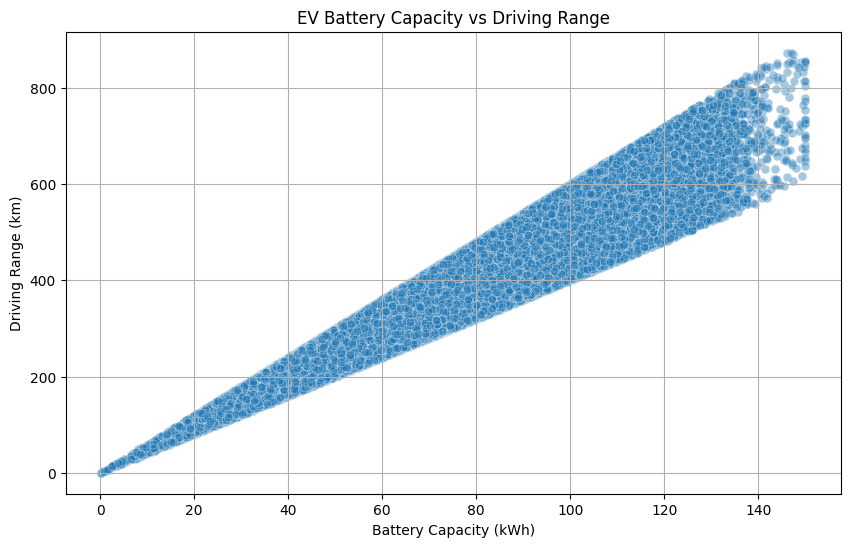

In [12]:
battery = df['battery_kwh']
rangekm = df['range_km']
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=battery,
    y=rangekm,
    alpha=0.4,        
    s=40              
)
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Driving Range (km)')
plt.title('EV Battery Capacity vs Driving Range')
plt.grid(True)
plt.show()

- There is a strong positive linear relationship between battery capacity and driving range.
- As battery capacity increases, the driving range increases almost proportionally, indicating efficient energy utilization across most EV models.
- The slight spread at higher battery capacities suggests variation in efficiency due to factors like vehicle weight, aerodynamics, and powertrain design.
- Higher-capacity batteries enable long-range EVs, but gains in range begin to vary rather than increase perfectly linearly.

### 2. Price vs Range

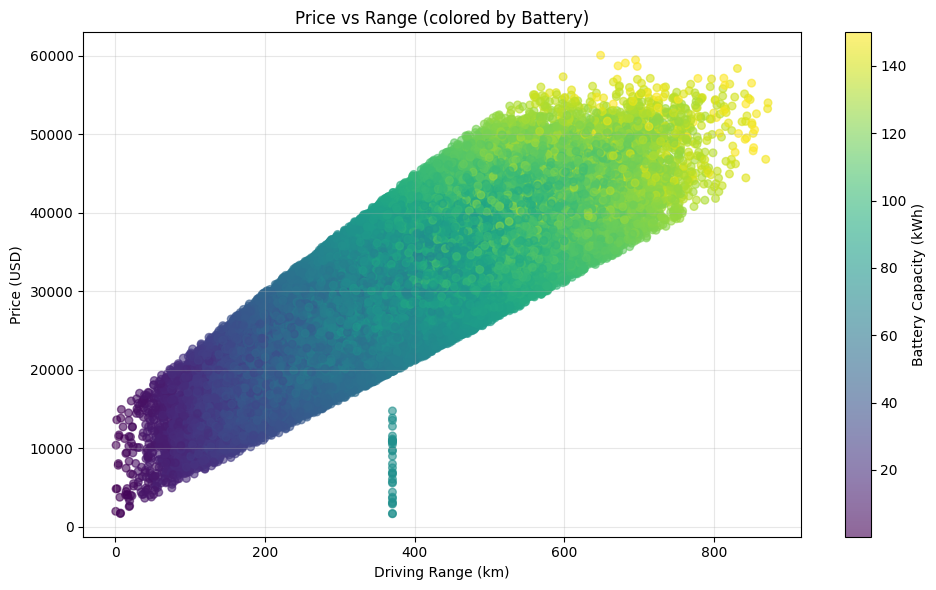

In [13]:
plt.figure(figsize=(10, 6))
scatter1 = plt.scatter(df['range_km'], df['price_usd'], 
                       c=df['battery_kwh'], cmap='viridis', 
                       alpha=0.6, s=30)
plt.xlabel('Driving Range (km)')
plt.ylabel('Price (USD)')
plt.title('Price vs Range (colored by Battery)')
plt.colorbar(scatter1, label='Battery Capacity (kWh)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- There is a strong positive relationship between driving range and price i.e EVs with higher range generally cost more.
- Battery capacity (color gradient) increases along with both range and price, indicating that larger batteries are a key driver of higher EV prices.
- Lower-priced EVs are concentrated at shorter ranges with smaller battery capacities, representing budget or city-focused models.
- At higher ranges, price variation widens, suggesting that factors beyond battery size (brand, performance, features) also influence pricing and few mid-range vehicles with moderate range but lower prices indicate efficient or cost-optimized models.

### 3. Price vs Battery

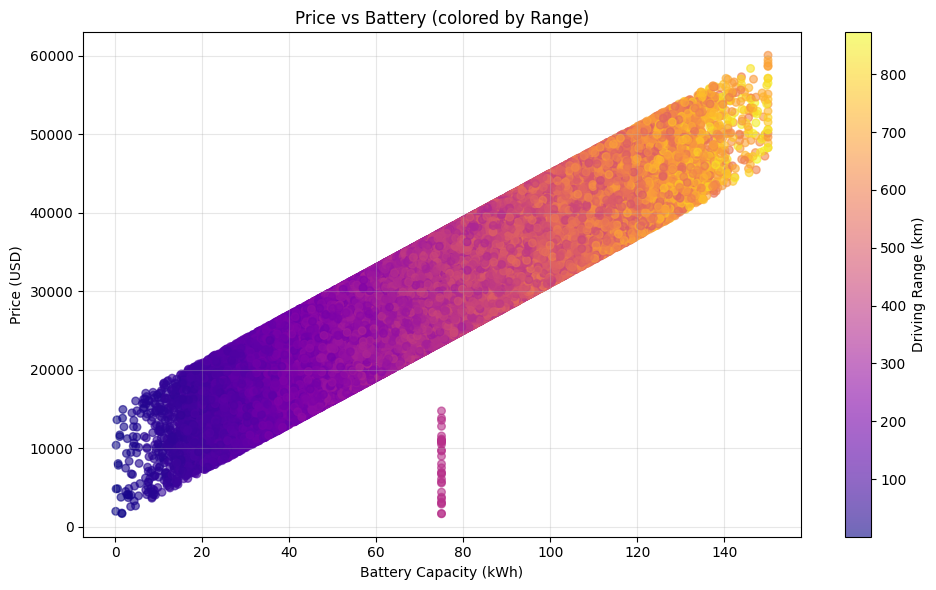

In [14]:
plt.figure(figsize=(10, 6))
scatter2 = plt.scatter(df['battery_kwh'], df['price_usd'], 
                       c=df['range_km'], cmap='plasma', 
                       alpha=0.6, s=30)
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Price (USD)')
plt.title('Price vs Battery (colored by Range)')
plt.colorbar(scatter2, label='Driving Range (km)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

EV price increases strongly with battery capacity, showing that larger batteries significantly raise vehicle cost. The color gradient indicates that higher battery capacities also deliver longer driving ranges, reinforcing battery size as the main link between price and range. A small cluster of lower-priced, mid-capacity vehicles suggests cost-optimized models that achieve reasonable range without very large batteries.

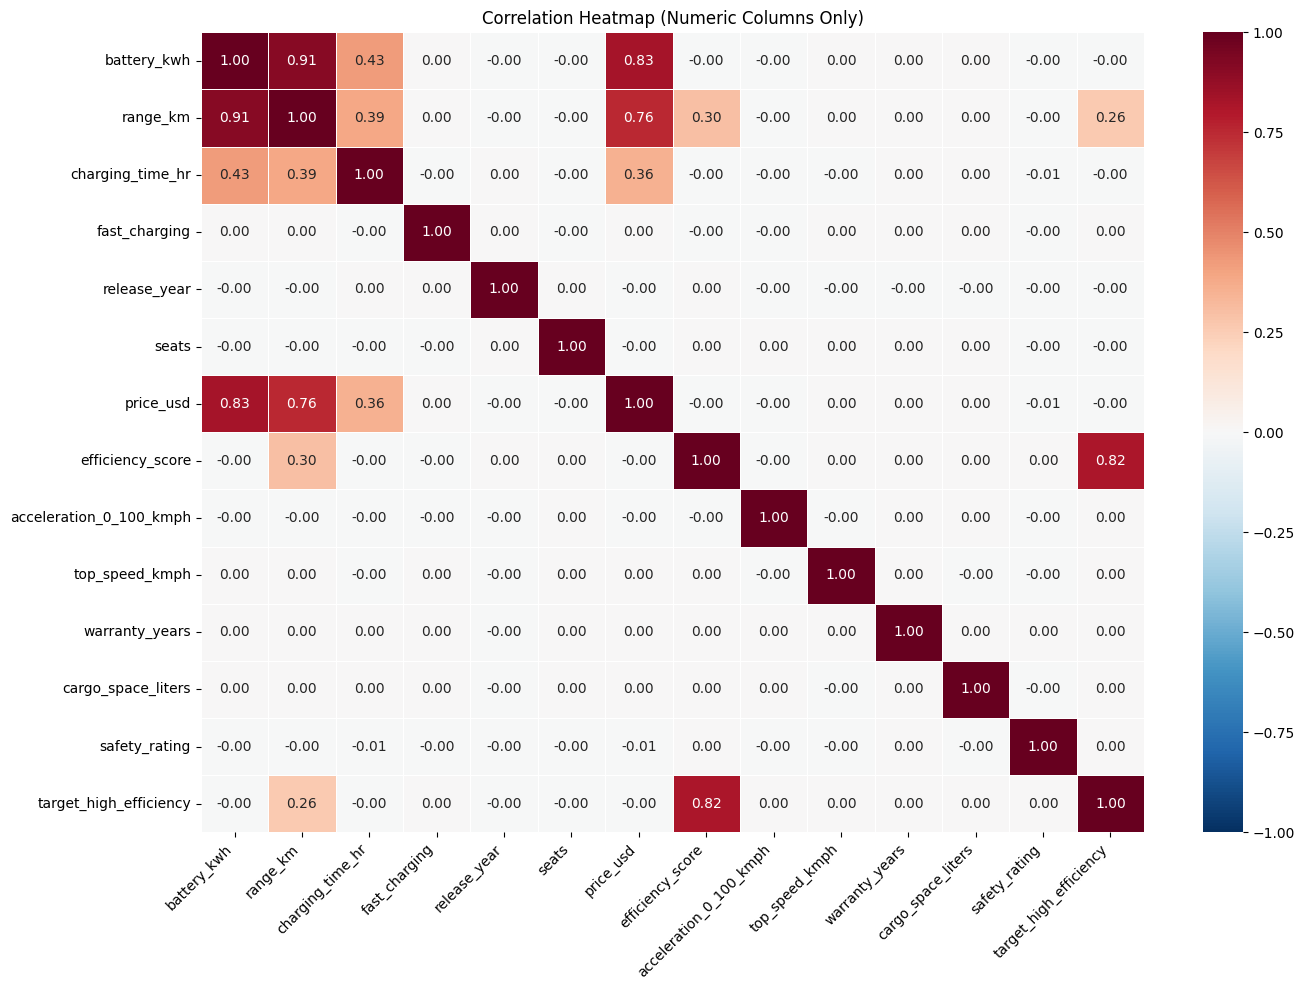

In [15]:
#Correlation Heatmap
ev_numeric = df.select_dtypes(include="number")
# correlation matrix
correlation_matrix = ev_numeric.corr()

# plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Battery capacity shows a strong positive correlation with driving range and vehicle price, confirming it as the primary technical factor influencing EV performance and cost. Driving range is also strongly associated with price, while charging time has only a moderate relationship with battery size and range. Most other variables (efficiency, speed, safety, features) show weak or near-zero correlations, indicating that EV pricing and performance are driven mainly by battery-related attributes rather than secondary specifications.

## Country Level Analysis

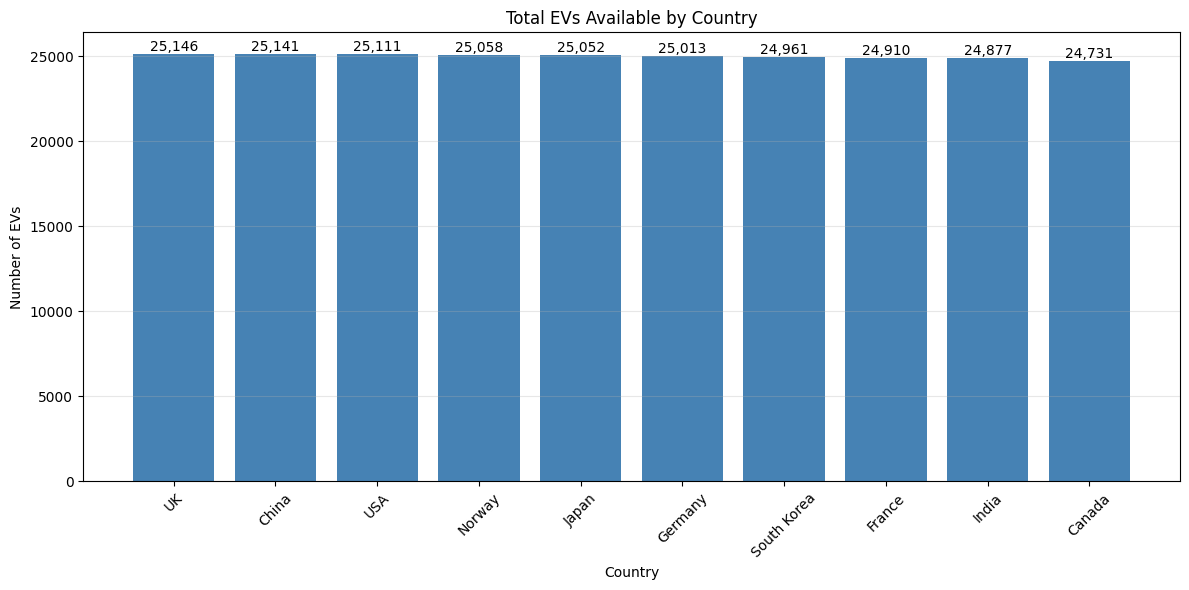

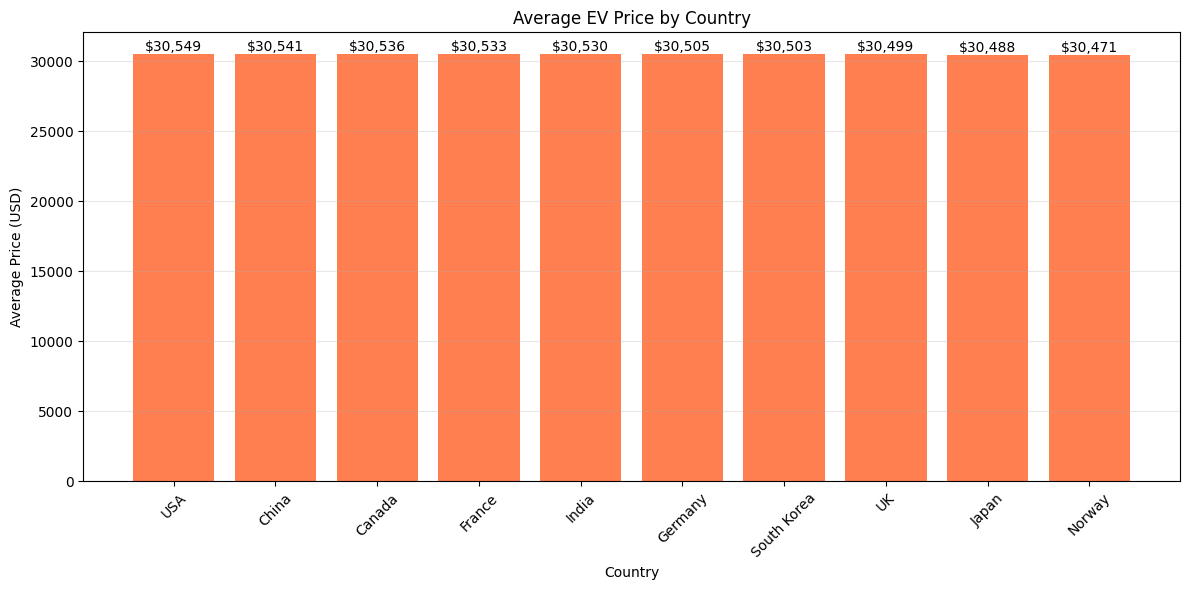

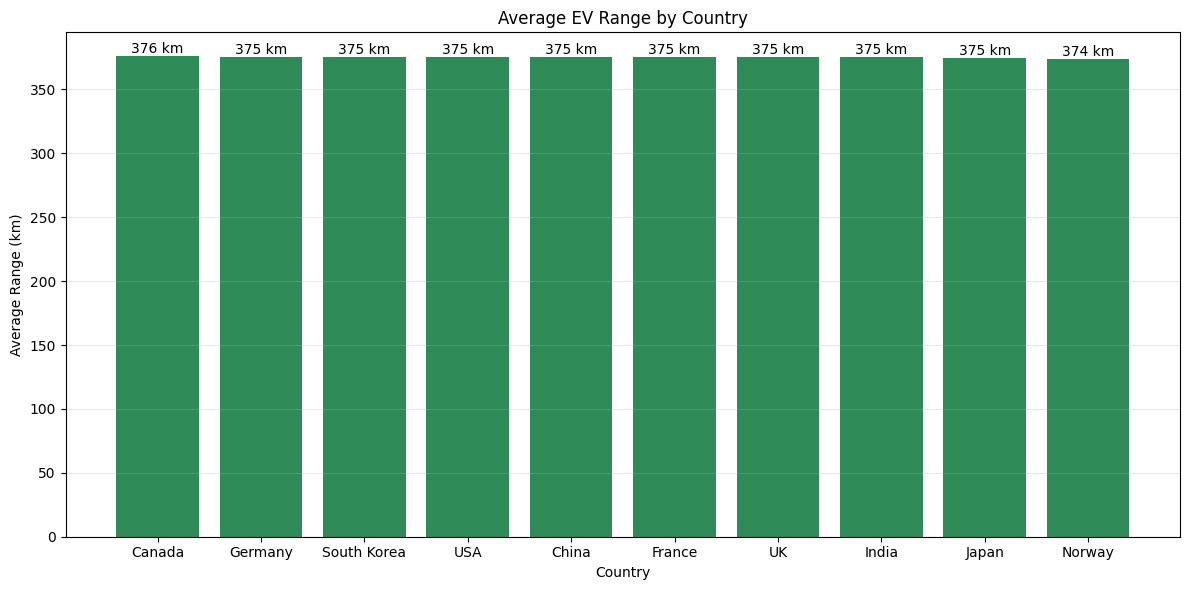

In [16]:
#EVs Available by Country
plt.figure(figsize=(12, 6))

country_counts = df['country'].value_counts().sort_values(ascending=False)
bars1 = plt.bar(country_counts.index, country_counts.values, color='steelblue')

plt.xlabel('Country')
plt.ylabel('Number of EVs')
plt.title('Total EVs Available by Country')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Average Price by country
plt.figure(figsize=(12, 6))
price_by_country = df.groupby('country')['price_usd'].mean().sort_values(ascending=False)
bars = plt.bar(price_by_country.index, price_by_country.values, color='coral')
plt.xlabel('Country')
plt.ylabel('Average Price (USD)')
plt.title('Average EV Price by Country')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Average Range by Country
plt.figure(figsize=(12, 6))

range_by_country = df.groupby('country')['range_km'].mean().sort_values(ascending=False)
bars3 = plt.bar(range_by_country.index, range_by_country.values, color='seagreen')

plt.xlabel('Country')
plt.ylabel('Average Range (km)')
plt.title('Average EV Range by Country')

plt.grid(True, alpha=0.3, axis='y')

# Add range labels
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f} km', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 1. EV Market Share 

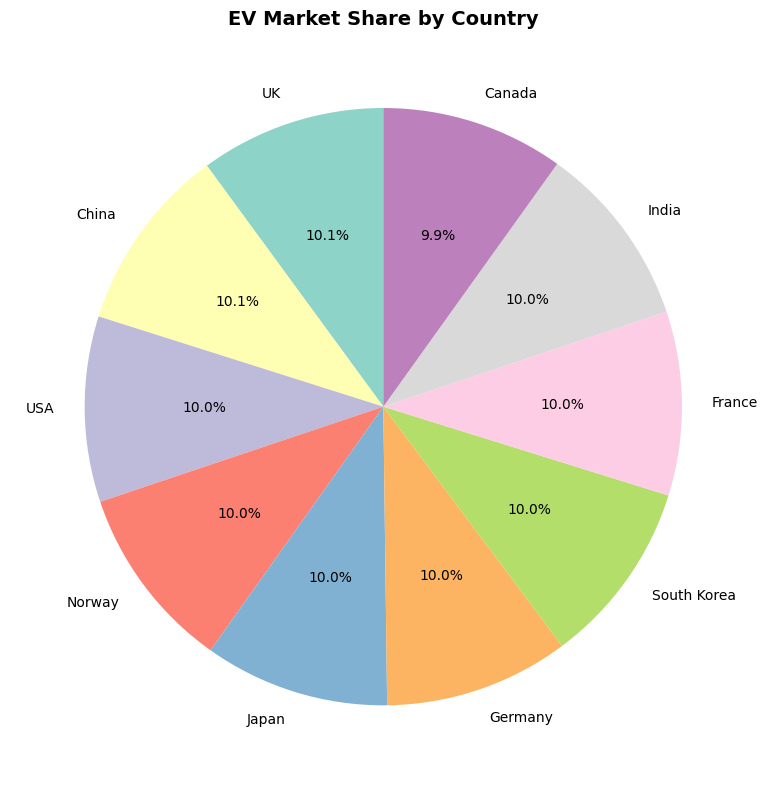

In [17]:

plt.figure(figsize=(10, 8))

country_counts = df['country'].value_counts()
country_share = (country_counts / country_counts.sum() * 100)

# Create pie chart
plt.pie(country_share.values, 
        labels=country_share.index, 
        autopct='%1.1f%%',
        startangle=90, 
        colors=plt.cm.Set3.colors,
        textprops={'fontsize': 10})

plt.title('EV Market Share by Country', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

This pie chart is indicating a competitive and relatively well-distributed global EV market rather than dominance by a single nation.

### 2. EV Price Distribution

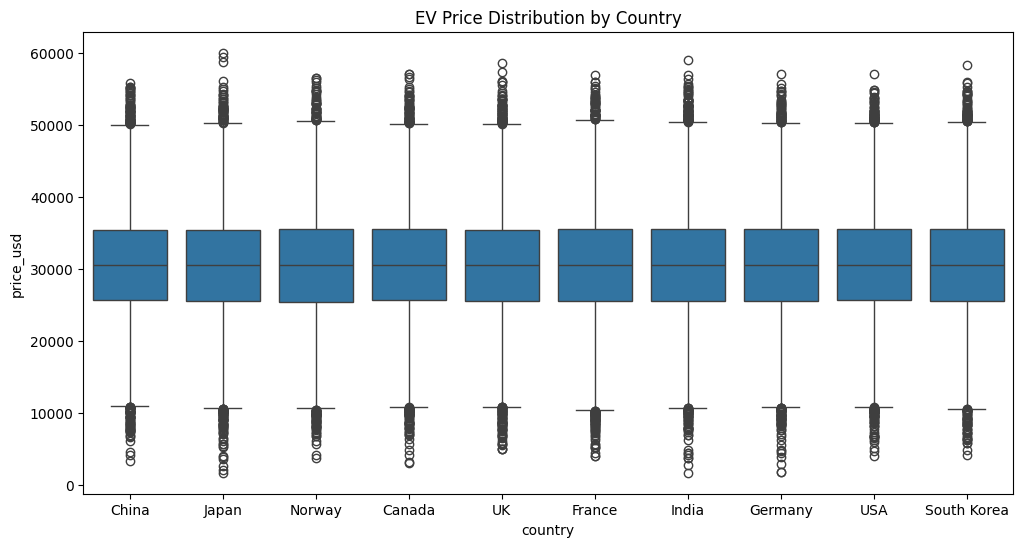

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='price_usd', data=df)
plt.title('EV Price Distribution by Country')
plt.show()


### 3. EV Type Availability

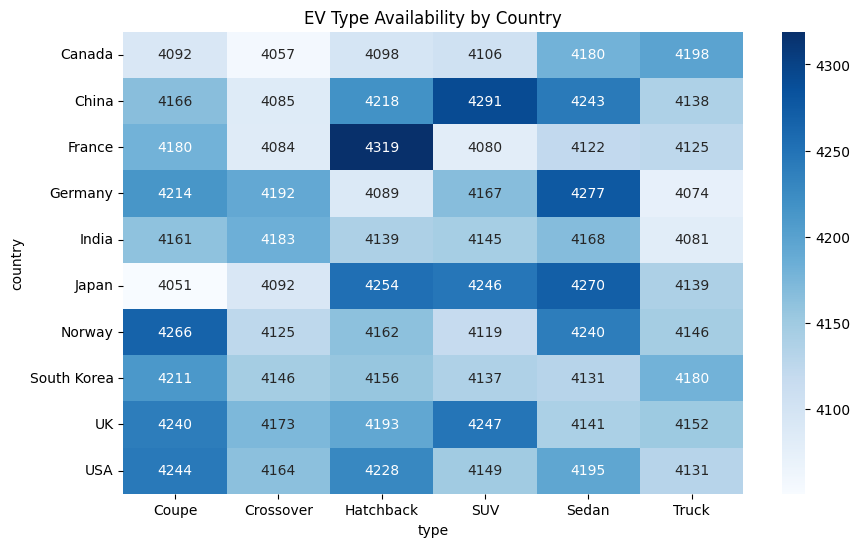

In [19]:
type_country = (
    df.groupby(['country', 'type'])
      .size()
      .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))
sns.heatmap(type_country, annot=True, fmt='d', cmap='Blues')
plt.title('EV Type Availability by Country')
plt.show()


The heatmap shows a relatively balanced distribution of EV body types across all countries, with no single vehicle type overwhelmingly dominating the market. SUVs, sedans, hatchbacks, coupes, and crossovers all show similar availability levels in most regions. Trucks are slightly less common overall but are still present across multiple countries rather than being limited to just the USA and Canada. Overall, the chart suggests broad product diversity rather than strong country-specific specialization in EV body types.

### 4. Descriptive Statistical Summary(country)

In [20]:
table = df.groupby('country').agg(
    Total_EVs=('model', 'count'),
    Models=('model', 'nunique'),
    Manufacturers=('manufacturer', 'nunique'),
    Median_Price_USD=('price_usd', 'median'),
    Median_Range_km=('range_km', 'median'),
    Fast_Charging_Pct=('fast_charging', lambda x: x.mean()*100),
    Most_Common_Type=('type', lambda x: x.mode()[0])
).reset_index()

table


,country,Total_EVs,Models,Manufacturers,Median_Price_USD,Median_Range_km,Fast_Charging_Pct,Most_Common_Type
0,Canada,24731,11,10,30544.0,370.630,49.803890,Truck
1,China,25141,11,10,30506.0,369.940,50.025854,SUV
2,France,24910,11,10,30538.0,370.985,49.983942,Hatchback
3,Germany,25013,11,10,30486.0,370.920,49.506257,Sedan
4,India,24877,11,10,30468.0,370.170,50.303493,Crossover
5,Japan,25052,11,10,30460.5,370.035,49.856299,Sedan
6,Norway,25058,11,10,30482.5,369.290,49.720648,Coupe
7,South Korea,24961,11,10,30494.0,370.870,49.757622,Coupe
8,UK,25146,11,10,30489.0,370.235,49.709695,SUV
9,USA,25111,11,10,30550.0,370.800,50.177213,Coupe


Across all countries, total EV counts, number of models, and manufacturers are nearly identical, indicating a balanced dataset rather than real-world volume differences. Median EV prices cluster around $30,000 and median ranges around 370 km, suggesting similar positioning across markets. Fast-charging availability is also consistent at ~50%, showing uniform technology adoption. However, the most common EV type differs by country, reflecting regional consumer preferences (e.g., Trucks in Canada, SUVs in China and the UK, Sedans in Germany and Japan, and Coupes in Norway, South Korea, and the USA).

## City level analysis


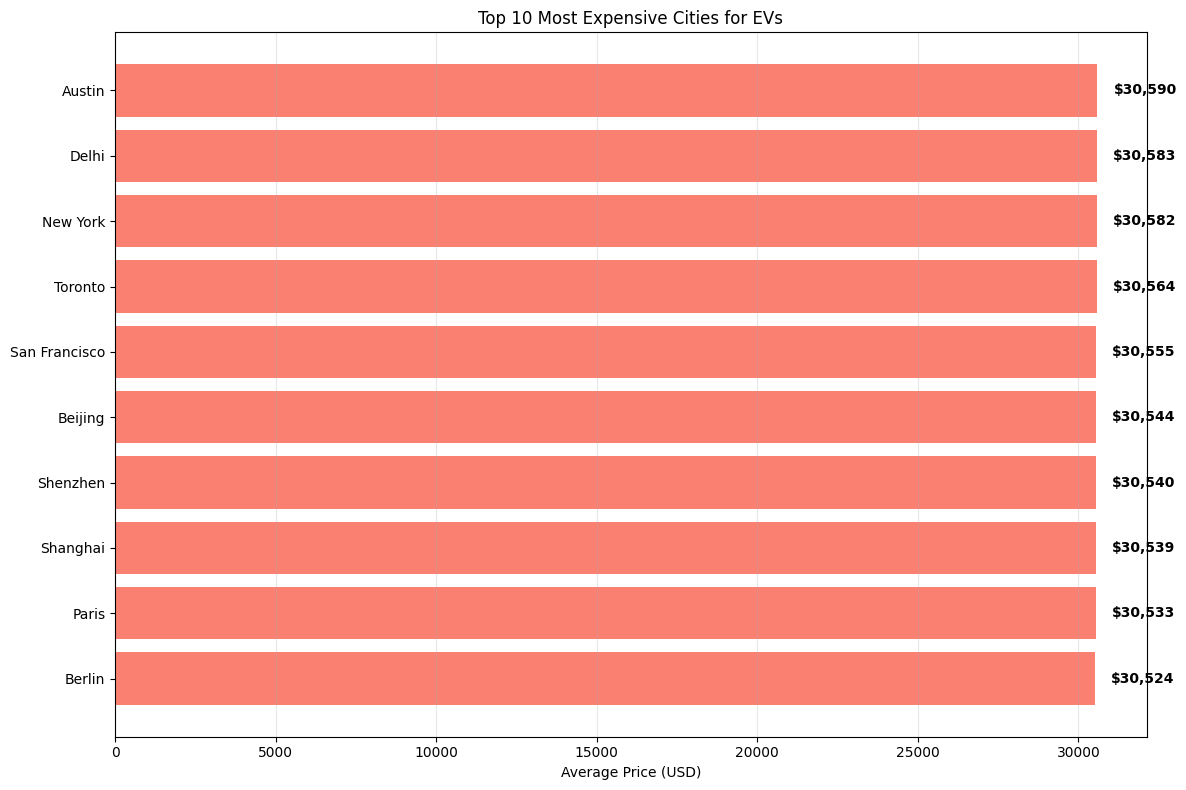

In [21]:
# Top 10 Most Expensive Cities for EVs
plt.figure(figsize=(12, 8))

price_by_city = df.groupby('city')['price_usd'].mean()
top_price_cities = price_by_city.nlargest(10).sort_values(ascending=True)
bars2 = plt.barh(top_price_cities.index, top_price_cities.values, color='salmon')

plt.xlabel('Average Price (USD)')
plt.title('Top 10 Most Expensive Cities for EVs')
plt.grid(True, alpha=0.3, axis='x')

# Add price labels
for i, (value, name) in enumerate(zip(top_price_cities.values, top_price_cities.index)):
    plt.text(value + 500, i, f'${value:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 1. Descriptive Statistical Summary(city)

In [22]:
city_table = df.groupby('city').agg(
    Total_EVs=('model', 'count'),
    Models=('model', 'nunique'),
    Manufacturers=('manufacturer', 'nunique'),
    Median_Price_USD=('price_usd', 'median'),
    Median_Range_km=('range_km', 'median'),
    Fast_Charging_Pct=('fast_charging', lambda x: x.mean()*100),
    Most_Common_Type=('type', lambda x: x.mode()[0])
).reset_index()

city_table

,city,Total_EVs,Models,Manufacturers,Median_Price_USD,Median_Range_km,Fast_Charging_Pct,Most_Common_Type
0,Austin,6361,11,10,30622.0,372.300,49.803490,Coupe
1,Bangalore,8132,11,10,30417.0,369.380,50.541072,Hatchback
2,Beijing,8439,11,10,30449.0,369.440,50.349567,SUV
3,Berlin,12563,11,10,30548.0,370.590,49.351270,Coupe
4,Delhi,8253,11,10,30509.0,371.740,50.624016,Crossover
5,London,12556,11,10,30467.0,369.240,49.952214,Truck
6,Manchester,12590,11,10,30513.0,370.980,49.467832,Coupe
7,Munich,12450,11,10,30433.5,371.375,49.662651,Sedan
8,New York,6208,11,10,30580.0,370.490,51.208119,Sedan
9,Osaka,12419,11,10,30456.0,370.110,49.915452,Sedan


Across cities, median EV prices (30,000), driving ranges (370 km), number of models, manufacturers, and fast-charging availability (~50%) are very similar, indicating a standardized dataset rather than large real-world differences. However, the most common EV type varies by city, showing regional preferences. For example, hatchbacks are common in Tokyo and Paris, sedans in Munich and New York, SUVs in Beijing and Shanghai, and trucks in London and Vancouver.

### 2. EV Type Availability

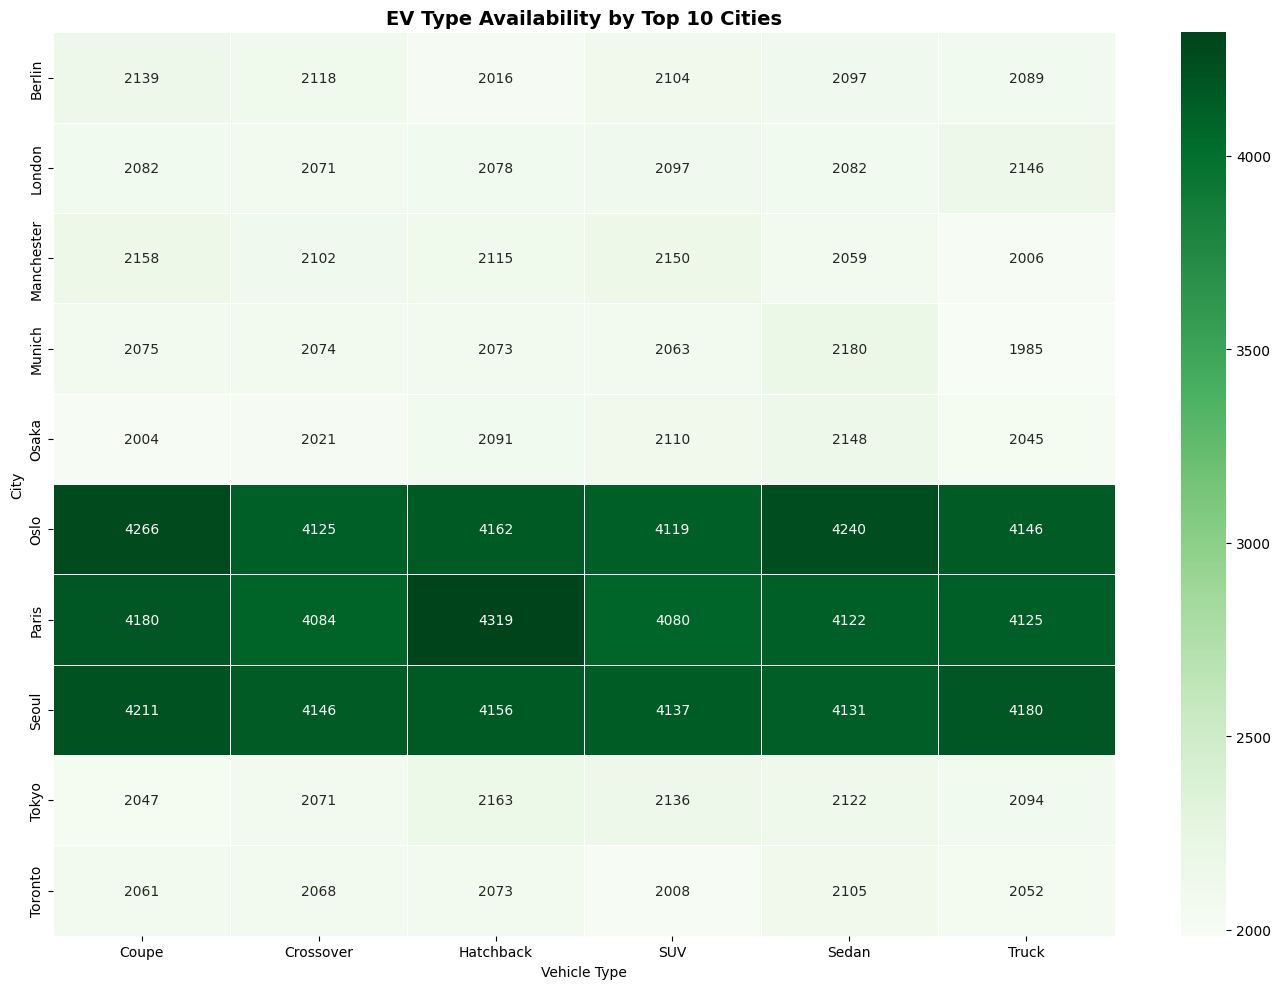

In [23]:
# EV Type Availability by City (Top 10 Cities)
plt.figure(figsize=(14, 10))

# Get top 15 cities by EV count
top_cities = df['city'].value_counts().nlargest(10).index

# Filter data for top cities
df_top_cities = df[df['city'].isin(top_cities)]

type_city = (
    df_top_cities.groupby(['city', 'type'])
                 .size()
                 .unstack(fill_value=0)
)

sns.heatmap(type_city, annot=True, fmt='d', cmap='Greens', linewidths=0.5)
plt.title('EV Type Availability by Top 10 Cities', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('City')
plt.tight_layout()
plt.show()

The heatmap shows that EV type availability is fairly balanced within each city, but overall volume differs by city. Oslo, Paris, and Seoul display the highest availability across all vehicle types, while cities like Berlin, London, Munich, Osaka, Tokyo, and Toronto show lower but still evenly distributed counts. No single vehicle type overwhelmingly dominates within individual cities, suggesting broad product variety rather than strong city-specific specialization.


## Manufacturers and Efficiency

### 1. Market Share by Manufacturer

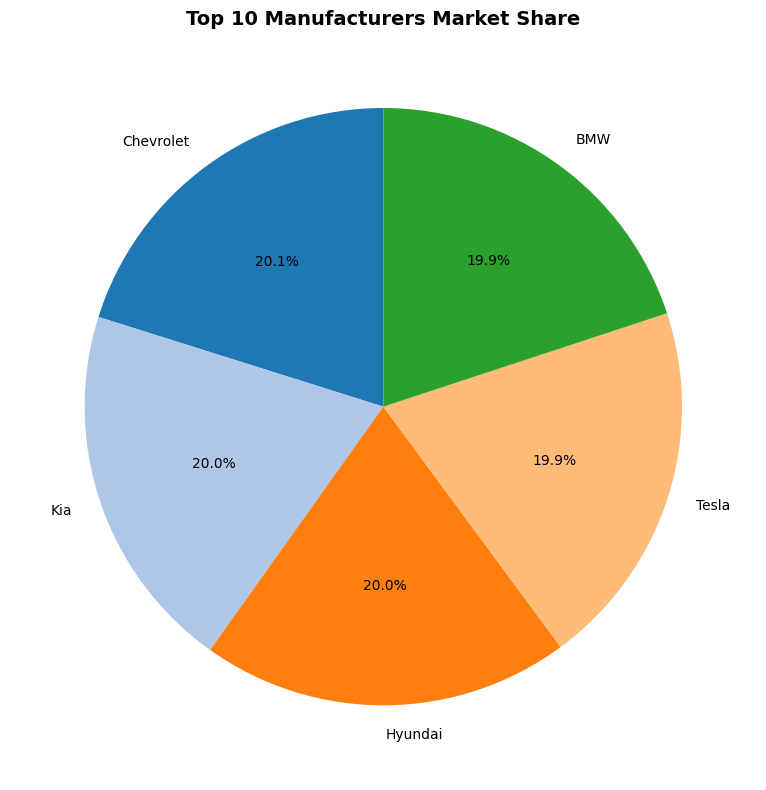

In [24]:
# Top 10 Manufacturers Market Share
plt.figure(figsize=(10, 8))

manufacturer_counts = df['manufacturer'].value_counts()
top_10_manufacturers = manufacturer_counts.head()

plt.pie(top_10_manufacturers.values, 
        labels=top_10_manufacturers.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.tab20.colors)
plt.title('Top 10 Manufacturers Market Share', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Manufacturer Performance Analysis

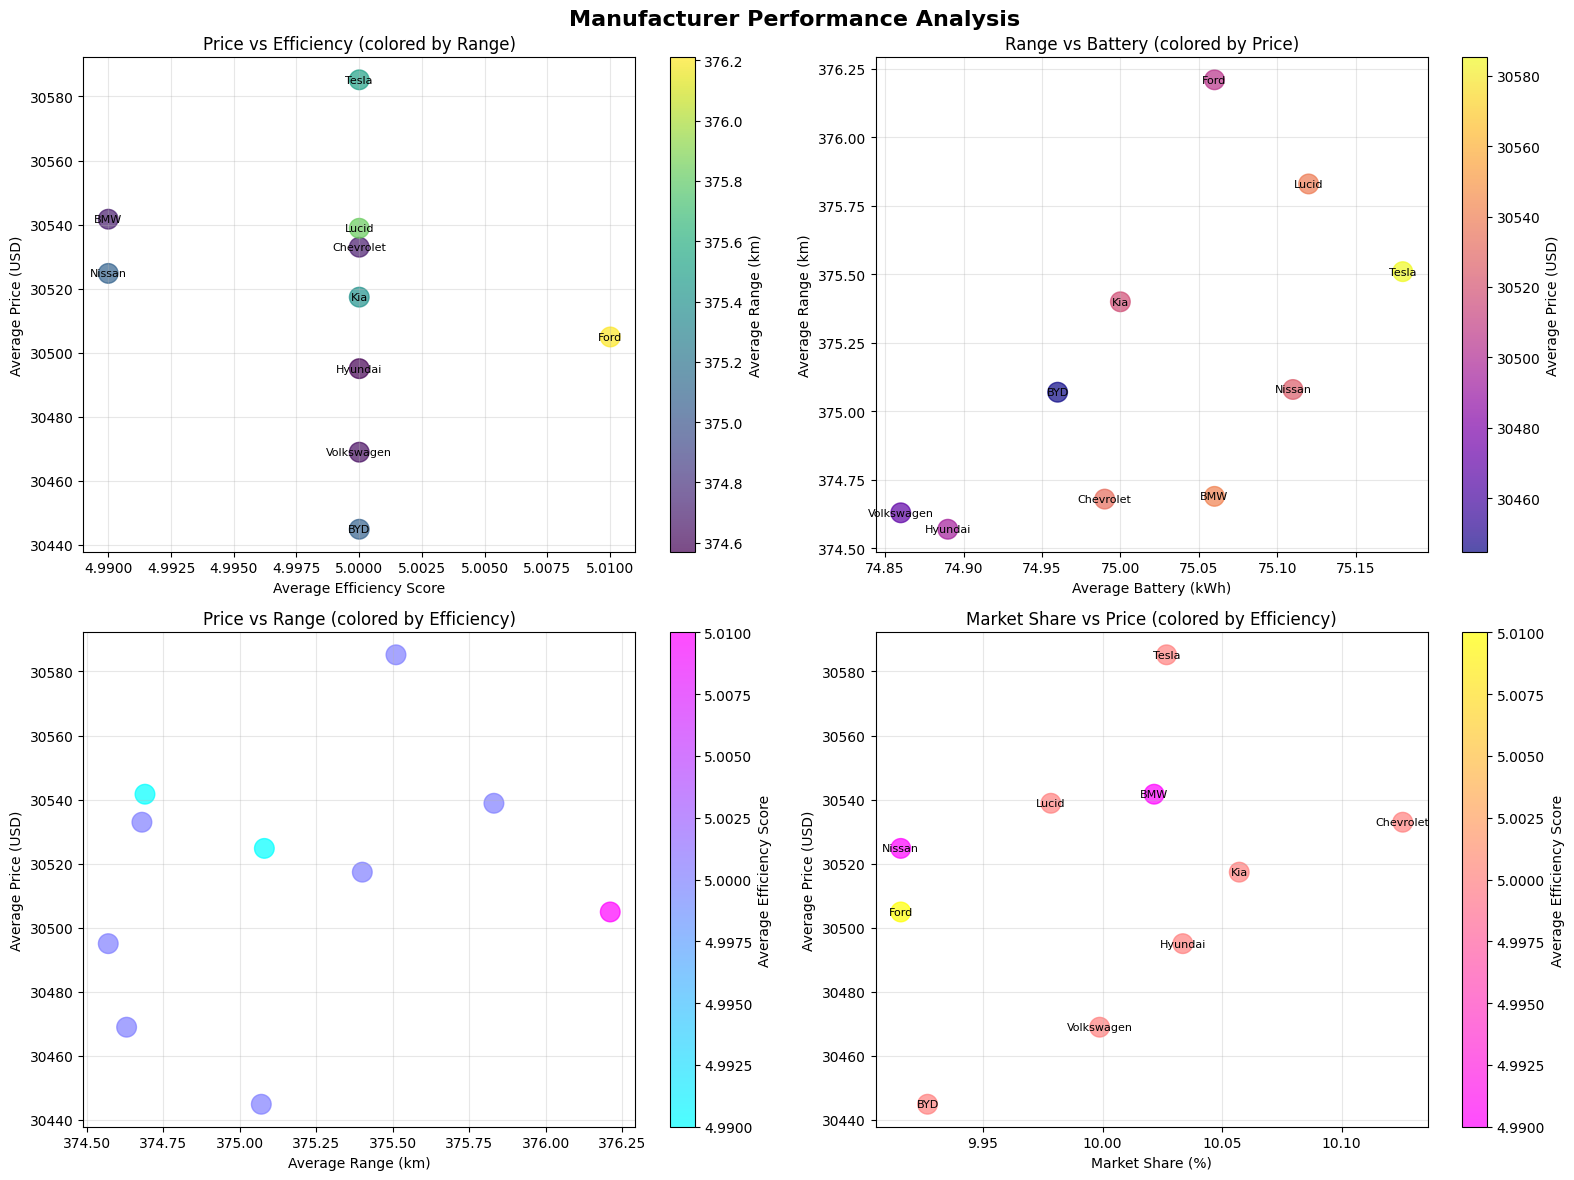

In [25]:
# Manufacturer Performance Scatter Matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Manufacturer Performance Analysis', fontsize=16, fontweight='bold')

# Get manufacturer averages
manufacturer_stats = df.groupby('manufacturer').agg({
    'price_usd': 'mean',
    'range_km': 'mean',
    'battery_kwh': 'mean',
    'efficiency_score': 'mean'
}).round(2)

# 1. Price vs Efficiency
scatter1 = axes[0,0].scatter(manufacturer_stats['efficiency_score'], 
                            manufacturer_stats['price_usd'],
                            s=200, alpha=0.7, c=manufacturer_stats['range_km'], 
                            cmap='viridis')
axes[0,0].set_xlabel('Average Efficiency Score')
axes[0,0].set_ylabel('Average Price (USD)')
axes[0,0].set_title('Price vs Efficiency (colored by Range)')
plt.colorbar(scatter1, ax=axes[0,0], label='Average Range (km)')
axes[0,0].grid(True, alpha=0.3)

# Add manufacturer labels
for manuf, eff, price in zip(manufacturer_stats.index, 
                             manufacturer_stats['efficiency_score'], 
                             manufacturer_stats['price_usd']):
    axes[0,0].text(eff, price, manuf, fontsize=8, ha='center', va='center')

# 2. Range vs Battery
scatter2 = axes[0,1].scatter(manufacturer_stats['battery_kwh'], 
                            manufacturer_stats['range_km'],
                            s=200, alpha=0.7, c=manufacturer_stats['price_usd'], 
                            cmap='plasma')
axes[0,1].set_xlabel('Average Battery (kWh)')
axes[0,1].set_ylabel('Average Range (km)')
axes[0,1].set_title('Range vs Battery (colored by Price)')
plt.colorbar(scatter2, ax=axes[0,1], label='Average Price (USD)')
axes[0,1].grid(True, alpha=0.3)

# Add manufacturer labels
for manuf, battery, range_val in zip(manufacturer_stats.index, 
                                     manufacturer_stats['battery_kwh'], 
                                     manufacturer_stats['range_km']):
    axes[0,1].text(battery, range_val, manuf, fontsize=8, ha='center', va='center')

# 3. Price vs Range
scatter3 = axes[1,0].scatter(manufacturer_stats['range_km'], 
                            manufacturer_stats['price_usd'],
                            s=200, alpha=0.7, c=manufacturer_stats['efficiency_score'], 
                            cmap='cool')
axes[1,0].set_xlabel('Average Range (km)')
axes[1,0].set_ylabel('Average Price (USD)')
axes[1,0].set_title('Price vs Range (colored by Efficiency)')
plt.colorbar(scatter3, ax=axes[1,0], label='Average Efficiency Score')
axes[1,0].grid(True, alpha=0.3)

# 4. Market Share vs Average Price
market_share = (df['manufacturer'].value_counts() / len(df) * 100)
price_vs_share = pd.DataFrame({
    'Market Share (%)': market_share,
    'Avg Price': manufacturer_stats['price_usd']
})

scatter4 = axes[1,1].scatter(price_vs_share['Market Share (%)'], 
                            price_vs_share['Avg Price'],
                            s=200, alpha=0.7, c=manufacturer_stats['efficiency_score'], 
                            cmap='spring')
axes[1,1].set_xlabel('Market Share (%)')
axes[1,1].set_ylabel('Average Price (USD)')
axes[1,1].set_title('Market Share vs Price (colored by Efficiency)')
plt.colorbar(scatter4, ax=axes[1,1], label='Average Efficiency Score')
axes[1,1].grid(True, alpha=0.3)

for manuf, share, price in zip(price_vs_share.index, 
                               price_vs_share['Market Share (%)'], 
                               price_vs_share['Avg Price']):
    axes[1,1].text(share, price, manuf, fontsize=8, ha='center', va='center')

plt.tight_layout()
plt.show()

- Tesla likely shows the strongest price-to-efficiency ratio, with competitive range.
- Lucid appears in the high-price, high-efficiency segment, possibly with long range.
- Hyundai and Kia cluster in the mid-price, good efficiency zone, appealing to budget-conscious buyers.
- Prices are tightly clustered across manufacturers, indicating a highly standardized market where average EV prices differ only marginally despite brand differences.
- Battery size strongly influences driving range, but higher battery capacity does not always translate into significantly higher prices, showing efficient battery utilization by some manufacturers.
- Efficiency scores are very similar across brands and show weak influence on price or market share, suggesting manufacturers compete more on range, brand value, and positioning than on efficiency alone.

### 3. Efficiency Distribution by Manufacturer

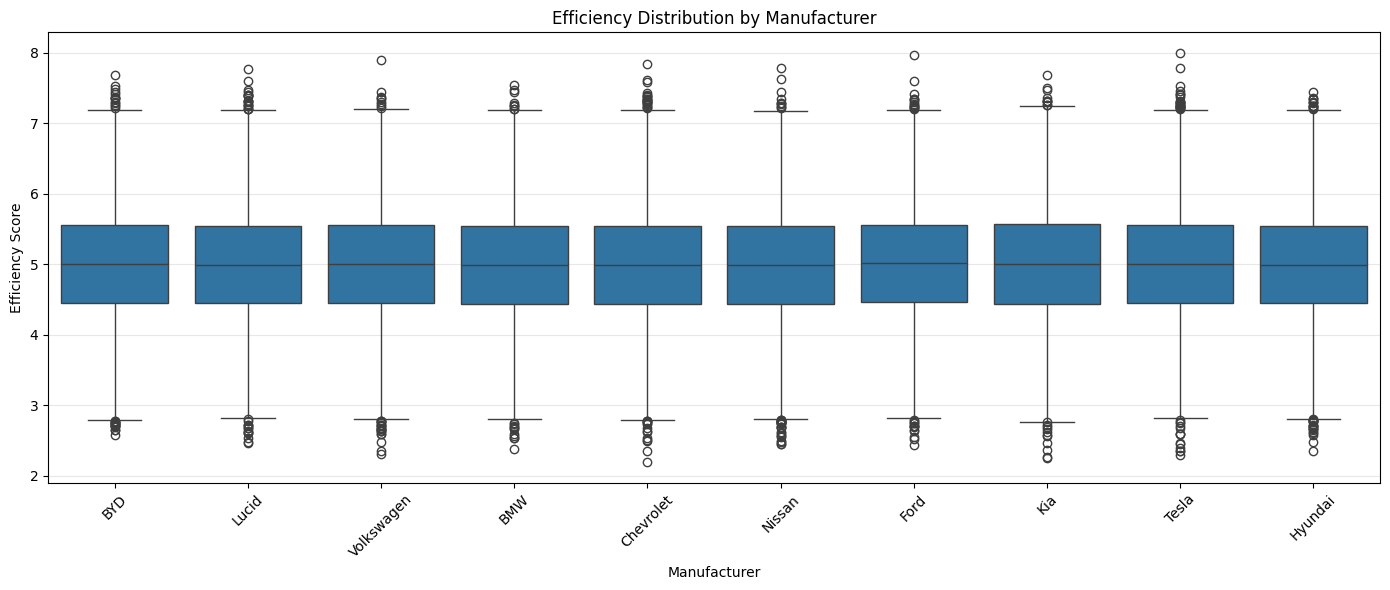

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='manufacturer', y='efficiency_score')
plt.xlabel('Manufacturer')
plt.ylabel('Efficiency Score')
plt.title('Efficiency Distribution by Manufacturer')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 4. Efficiency Distribution by Vehicle Type

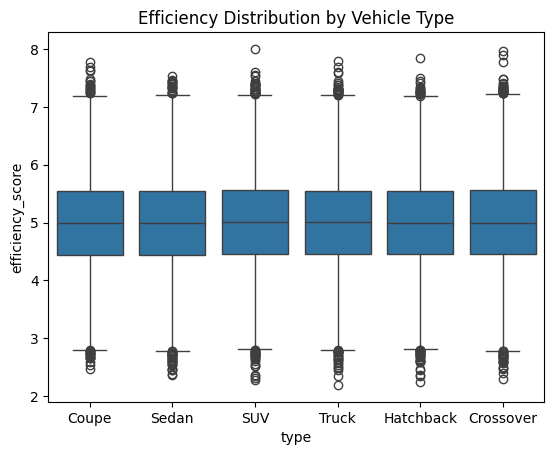

In [27]:
sns.boxplot(x='type', y='efficiency_score', data=df)
plt.title('Efficiency Distribution by Vehicle Type')
plt.show()


### 5. Efficiency vs Battery Size

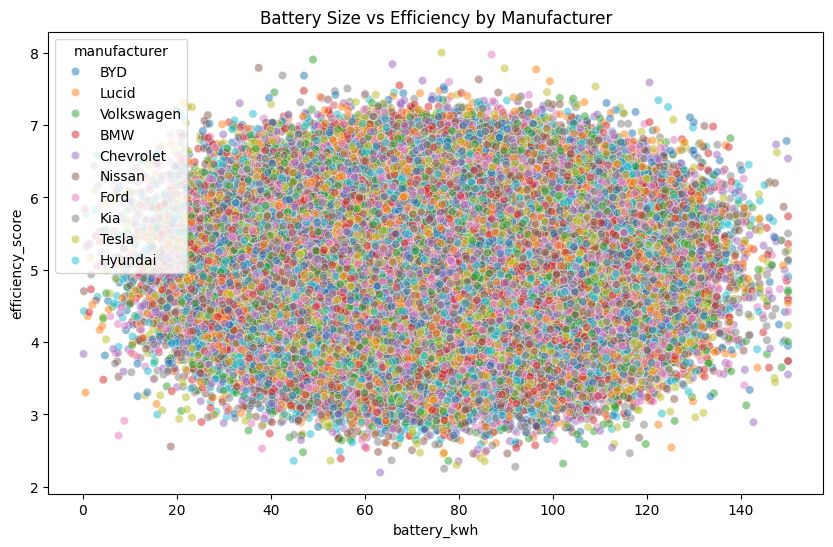

In [28]:
battery = df['battery_kwh']
efficiency = df['efficiency_score']
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=battery,
    y=efficiency,
    hue='manufacturer',
    data=df,
    alpha=0.5
)
plt.title('Battery Size vs Efficiency by Manufacturer')
plt.show()



Battery size shows no strong relationship with efficiency—efficiency scores remain widely spread across all battery capacities. Manufacturers largely overlap, indicating similar efficiency levels regardless of brand or battery size. This suggests that efficiency is driven more by vehicle design, powertrain optimization, and software rather than simply increasing battery capacity.

### 6. Efficiency Trends Over Time

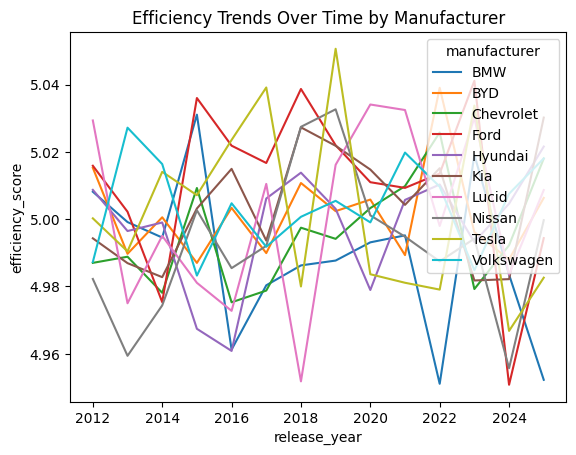

In [29]:
efficiency_year = (
    df.groupby(['release_year', 'manufacturer'])['efficiency_score']
      .mean()
      .reset_index()
)
sns.lineplot(
    x='release_year',
    y='efficiency_score',
    hue='manufacturer',
    data=efficiency_year
)
plt.title('Efficiency Trends Over Time by Manufacturer')
plt.show()


Efficiency scores across manufacturers remain relatively stable over time, with only minor year-to-year fluctuations. No brand shows a strong upward or downward trend, suggesting that efficiency improvements are incremental rather than disruptive. Differences between manufacturers are small, indicating that efficiency technology is fairly mature and standardized across the EV industry, with most brands operating within a similar performance range.

### Distribution of EV Drive Types by Country

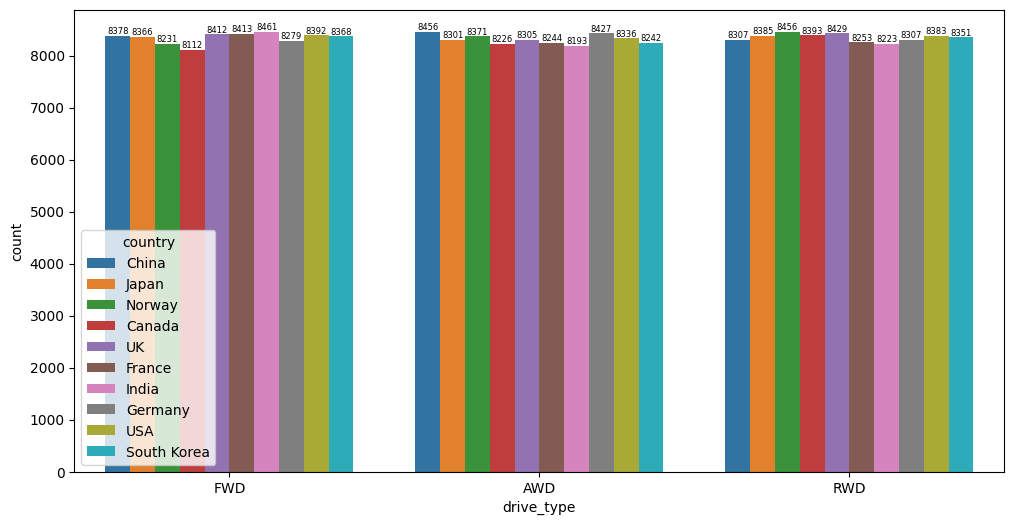

In [30]:
plt.figure(figsize=(12,6))
ax = sns.countplot(
    x='drive_type',
    hue='country',
    data=df
)

for container in ax.containers:
    ax.bar_label(container, fontsize=6)

plt.xticks(rotation=0)
plt.show()


### Drive Type Distribution by Manufacturer

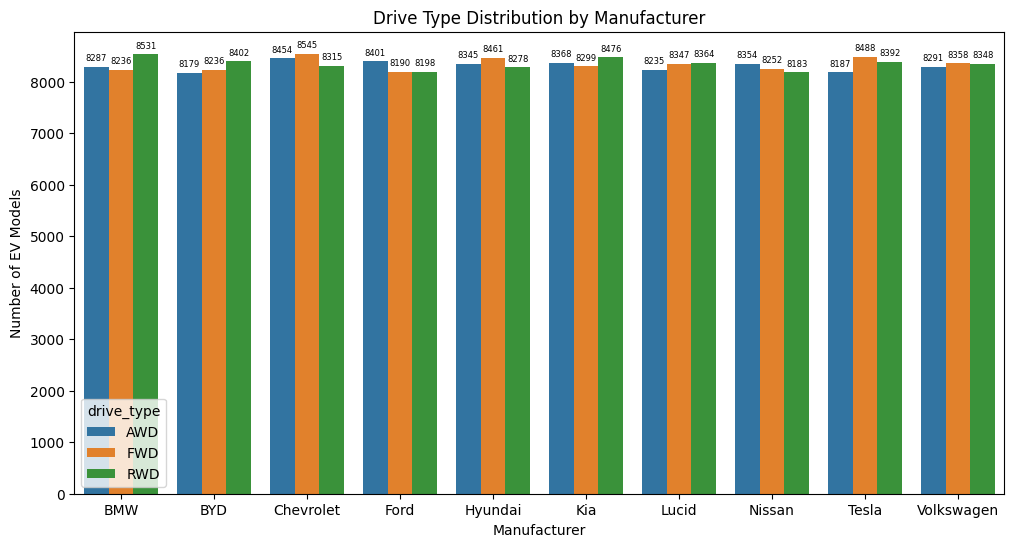

In [31]:
drive_manufacturer = (
    df.groupby(['manufacturer', 'drive_type'])
      .size()
      .reset_index(name='count')
)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='manufacturer',
    y='count',
    hue='drive_type',
    data=drive_manufacturer
)
plt.xticks(rotation=0)
plt.xlabel('Manufacturer')
plt.ylabel('Number of EV Models')
plt.title('Drive Type Distribution by Manufacturer')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=6)

plt.show()


## Key Market Insights

- Market Structure is Highly Balanced -
  Across countries and cities, EV prices (30K), driving ranges (370 km), number of models, manufacturers, and fast-charging availability (~50%) are very similar, indicating a standardized dataset rather than extreme regional gaps.
- Battery Size Drives Performance and Price - Battery capacity shows strong links with both range and vehicle price, confirming it as the central technical and cost driver in the EV market.
- Efficiency is Not a Major Pricing Factor - Efficiency varies between manufacturers, but its weak correlation with price shows that brands are not charging significantly more for better energy efficiency alone.
- Multiple Engineering Strategies Exist - Some manufacturers achieve higher range with moderate battery sizes (efficiency-focused), while others rely on larger batteries to deliver range (capacity-focused approach).
- Market Share is Not Directly Tied to Price - Brands with both moderate and premium pricing appear across different market share levels, suggesting positioning, brand value, and product mix matter as much as price.
- Vehicle Type Mix Varies by Region (But No Strong Global Dominance) - The heatmaps show that all EV body types are available across most countries and cities, with differences in the most common type reflecting local preferences rather than a single globally dominant segment.